In [1]:
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
df = pd.merge(ratings , movies , on = "movieId")

In [8]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [11]:
df.groupby("title")["rating"].mean().sort_values(ascending = False).head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

In [12]:
df.groupby("title")["rating"].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [16]:
rating = pd.DataFrame (df.groupby("title")["rating"].mean())
rating["n_ratings"] = pd.DataFrame (df.groupby("title")["rating"].count())

In [17]:
rating.head()

,rating,n_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 
%matplotlib inline
              

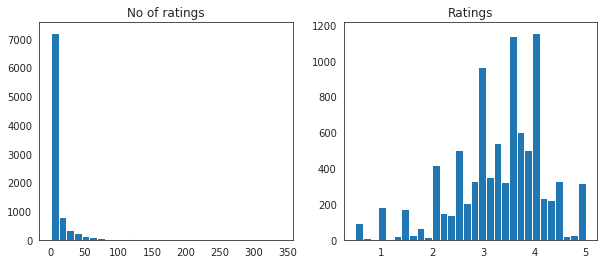

In [29]:
 f , (ax1 , ax2) = plt.subplots (nrows = 1 , ncols = 2 , figsize = (10,4))
    
ax1.set_title("No of ratings")
ax1.hist(rating["n_ratings"] , bins = 30);

ax2.set_title("Ratings")
ax2.hist(rating["rating"] , bins = 30);

/home/unbeatable/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


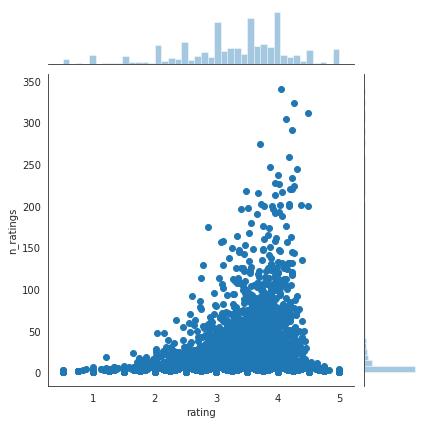

In [30]:
sns.jointplot (x = "rating" , y = "n_ratings" , data = rating)

In [31]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [32]:
rating_mat  = df.pivot_table(values = "rating" , index = "userId" , columns = "title")

In [33]:
rating_mat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
rating.sort_values("n_ratings" , ascending = False)

,rating,n_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


In [35]:
movies[movies["title"] == "Forrest Gump (1994)"]

,movieId,title,genres
321,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [36]:
movies[movies["title"] == "Matrix, The (1999)"]

,movieId,title,genres
2062,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [38]:
FG_user_ratings = rating_mat["Forrest Gump (1994)"]
Matrix_user_ratings = rating_mat["Matrix, The (1999)"]                          

In [41]:
FG_user_ratings.head() , Matrix_user_ratings.head()

(userId
 1    NaN
 2    3.0
 3    5.0
 4    5.0
 5    4.0
 Name: Forrest Gump (1994), dtype: float64, userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Matrix, The (1999), dtype: float64)

In [42]:
similar_to_FG = rating_mat.corrwith(FG_user_ratings)
similar_to_Matrix = rating_mat.corrwith(Matrix_user_ratings)


/home/unbeatable/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/unbeatable/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [43]:
similar_to_FG.head()

title
"Great Performances" Cats (1998)           NaN
$9.99 (2008)                               1.0
'Hellboy': The Seeds of Creation (2004)    NaN
'Neath the Arizona Skies (1934)            NaN
'Round Midnight (1986)                     NaN
dtype: float64

In [46]:
corr_FG = pd.DataFrame(similar_to_FG , columns = ["correlationFG"])
corr_Matrix = pd.DataFrame(similar_to_Matrix, columns = ["correlationMatrix"])



In [47]:
corr_FG

,correlationFG
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.000000
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN
"'burbs, The (1989)",0.044946
'night Mother (1986),NaN


In [50]:
corr_FG.dropna(inplace = True)
corr_Matrix.dropna(inplace = True)

In [51]:
corr_FG.head()

,correlationFG
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


In [53]:
corr_Matrix.sort_values("correlationMatrix" , ascending = False).head()

,correlationMatrix
title,
Project X (2012),1.0
Sergeant York (1941),1.0
"Musketeer, The (2001)",1.0
Allan Quatermain and the Lost City of Gold (1987),1.0
Honeysuckle Rose (a.k.a. On the Road Again) (1980),1.0


(array([6.476e+03, 9.490e+02, 4.540e+02, 3.020e+02, 1.610e+02, 1.340e+02,
        1.170e+02, 9.000e+01, 6.400e+01, 3.900e+01, 4.200e+01, 3.500e+01,
        2.100e+01, 2.100e+01, 1.400e+01, 2.400e+01, 1.500e+01, 1.600e+01,
        1.600e+01, 8.000e+00, 4.000e+00, 1.000e+01, 4.000e+00, 6.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 8.000e+00,
        0.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1. ,   7.8,  14.6,  21.4,  28.2,  35. ,  41.8,  48.6,  55.4,
         62.2,  69. ,  75.8,  82.6,  89.4,  96.2, 103. , 109.8, 116.6,
        123.4, 130.2, 137. , 143.8, 150.6, 157.4, 164.2, 171. , 177.8,
        184.6, 191.4, 198.2, 205. , 211.8, 218.6, 225.4, 232.2, 239. ,
        245.8, 252.6, 259.4, 266.2, 273. , 279.8, 286.6, 293.4, 300.2,
        307. , 313.8,

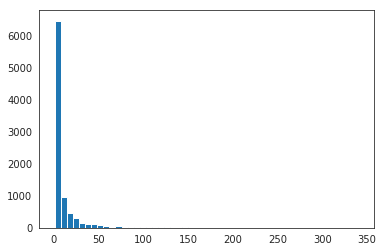

In [63]:
plt.hist(rating["n_ratings"] , bins = 50)

In [89]:



corr_Matrix[corr_Matrix["n_ratings"] > 50].sort_values("correlationMatrix" , ascending = False)

,correlationMatrix,n_ratings
title,,
"Matrix, The (1999)",1.000000,259
Star Trek: Generations (1994),0.509976,114
"Prestige, The (2006)",0.458716,52
"Lord of the Rings: The Two Towers, The (2002)",0.451960,188
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.441993,200
Lethal Weapon (1987),0.437668,90
"Game, The (1997)",0.425481,76
Star Trek: First Contact (1996),0.421664,82
300 (2007),0.416096,59


In [82]:
corr_FG[corr_FG["n_ratings"] > 50].sort_values("correlationFG" , ascending = False).head()

,correlationFG,n_ratings
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65
